In [33]:
from astropy.io import fits
from astropy import table
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import os
from astropy import wcs
from astropy.table import Table, hstack, Column
from spectral_cube import SpectralCube
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [51]:
catalog = Table.read('./megacatalog_team_acc_final_say.fits')
cont_mosaic_hdu = fits.open('./CMZoom_continuum_pbcor.fits')
cat_mask = fits.getdata('./dendrogram_mask_pruned_rms3e6_k14_dv3_dd1_dp17_pp6_pm2_gal_02-02-20.fits')
cube_ID = 'G0.106-0.082.H2CO.218.2GHz.fits'
#G0.106-0.082.H2CO.218.2GHz.fits
#G0.340+0.055.H2CO.218.2GHz.fits
#G0.380+0.050.H2CO.218.2GHz.fits
cube_hdu = fits.open('./'+cube_ID)

#cube_hdu[0].header
del cube_hdu[0].header['TIMESYS']

In [50]:
cont_mosaic_hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                19000                                                  
NAXIS2  =                 2800                                                  
CTYPE1  = 'GLON-CAR'                                                            
CTYPE2  = 'GLAT-CAR'                                                            
CRVAL1  =                0.418                                                  
CRVAL2  =               -0.081                                                  
CRPIX1  =                 9500                                                  
CRPIX2  =                 1400                                                  
CDELT1  =    -0.00013888888888                                                  
CDELT2  =     0.000138888888

In [4]:
### construct necessary coordinate systems

cont_wcs = wcs.WCS(cont_mosaic_hdu[0])
cube_wcs = wcs.WCS(cube_hdu[0])
print(cube_wcs)
print(cube_hdu[0].header['CDELT3'])

WCS Keywords

Number of WCS axes: 3
CTYPE : 'GLON-SIN'  'GLAT-SIN'  'VRAD'  
CRVAL : 0.3385594558594  0.0573852309422  205094.860379762  
CRPIX : 175.0  146.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0001388888888889  0.0001388888888889  -1116.980806414887  
NAXIS : 294  311  369
-1.116980806414887


In [5]:
#### for each leaf, identify peak continuum flux pixel
lpp_x = np.zeros_like(catalog['leaf_ID'])
lpp_y = np.zeros_like(catalog['leaf_ID'])
lpp_gal = np.empty(len(catalog['leaf_ID']),dtype=type(cont_wcs.pixel_to_world(0,0)))
lpp_l = np.zeros_like(catalog['leaf_ID'])
lpp_b = np.zeros_like(catalog['leaf_ID'])

for i, leafi in enumerate(catalog['index']):
    leafpixi = np.where(cat_mask==leafi)
    lpp_x[i] = leafpixi[1][np.argmax(cont_mosaic_hdu[0].data[leafpixi])]
    lpp_y[i] = leafpixi[0][np.argmax(cont_mosaic_hdu[0].data[leafpixi])]
    lpp_gal[i] = cont_wcs.pixel_to_world_values(int(lpp_x[i]),int(lpp_y[i]))
    print(i, catalog['leaf_ID'][i], lpp_x[i], lpp_y[i], lpp_gal[i])
    
    



0 G359.615-0.243c 15214 201 (array(359.62424595), array(-0.24738112))
1 G359.615-0.243a 15282 230 (array(359.61480154), array(-0.24335315))
2 G359.615-0.243b 15260 219 (array(359.61785708), array(-0.24488099))
3 G0.316-0.201c 10180 483 (array(0.32341628), array(-0.20822211))
4 G0.316-0.201e 10185 516 (array(0.32272184), array(-0.20363878))
5 G0.316-0.201g 10242 517 (array(0.31480514), array(-0.20349987))
6 G0.316-0.201a 10236 534 (array(0.31563848), array(-0.20113876))
7 G0.316-0.201k 10263 546 (array(0.31188847), array(-0.19947208))
8 G0.316-0.201i 10232 552 (array(0.31619405), array(-0.19863876))
9 G0.316-0.201l 10253 552 (array(0.31327737), array(-0.19863875))
10 G0.316-0.201j 10243 557 (array(0.31466627), array(-0.19794431))
11 G0.316-0.201h 10230 575 (array(0.31647183), array(-0.19544432))
12 G0.316-0.201f 10254 579 (array(0.31313849), array(-0.19488875))
13 G0.316-0.201b 10229 600 (array(0.31661073), array(-0.1919721))
14 G0.316-0.201d 10249 603 (array(0.31383295), array(-0.19155

120 G359.889-0.093b 13289 1496 (array(359.89161076), array(-0.06752436))
121 G0.699-0.028aj 7939 1504 (array(0.63466681), array(-0.06641609))
122 G1.651-0.050a 633 1546 (array(1.6493895), array(-0.06056463))
123 G0.699-0.028am 7968 1553 (array(0.63063899), array(-0.05961055))
124 G359.948-0.052g 12856 1562 (array(359.95174979), array(-0.05835843))
125 G359.948-0.052h 12941 1573 (array(359.93994425), array(-0.05683051))
126 G359.948-0.052c 12844 1578 (array(359.95341649), array(-0.05613623))
127 G0.699-0.028ak 8019 1584 (array(0.62355563), array(-0.05530503))
128 G359.948-0.052m 12937 1592 (array(359.94049984), array(-0.05419163))
129 G0.699-0.028ai 7832 1589 (array(0.64952786), array(-0.05461045))
130 G359.948-0.052k 12888 1598 (array(359.94730541), array(-0.05335838))
131 G0.001-0.058i 12413 1608 (array(0.01327766), array(-0.0519702))
132 G0.619+0.012a 8169 1616 (array(0.60272227), array(-0.05086069))
133 G359.948-0.052b 12982 1616 (array(359.93424988), array(-0.05085822))
134 G0.070-

238 G0.489+0.010g 8977 2107 (array(0.4904999), array(0.0173334))
239 G359.137+0.031b 18660 2108 (array(359.14564071), array(0.01749219))
240 G0.489+0.010f 8955 2112 (array(0.49355545), array(0.01802785))
241 G359.734+0.002a 14368 2114 (array(359.74175098), array(0.0183112))
242 G0.489+0.010e 8932 2118 (array(0.49674988), array(0.01886119))
243 G1.602+0.018b 1013 2130 (array(1.59660934), array(0.02054491))
244 G0.253+0.016d 10626 2133 (array(0.26147246), array(0.02094475))
245 G0.489+0.010k 8929 2133 (array(0.49716655), array(0.02094452))
246 G359.865+0.022b 13499 2134 (array(359.86244529), array(0.02108714))
247 G0.253+0.016b 10642 2152 (array(0.25925025), array(0.02358364))
248 G0.489+0.010l 8925 2144 (array(0.4977221), array(0.0224723))
249 G0.489+0.010j 8930 2152 (array(0.49702765), array(0.02358341))
250 G1.602+0.018a 1013 2161 (array(1.59660921), array(0.02485047))
251 G0.253+0.016f 10672 2157 (array(0.25508359), array(0.02427811))
252 G0.253+0.016i 10646 2167 (array(0.2586947), a

In [164]:
cube_wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'GLON-SIN'  'GLAT-SIN'  'VRAD'  
CRVAL : 0.3385594558594  0.0573852309422  205094.860379762  
CRPIX : 175.0  146.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0001388888888889  0.0001388888888889  -1116.980806414887  
NAXIS : 294  311  369

In [165]:
### testing for a single leaf
# k, leafk = 0, catalog['index'][0]
# leafpixk = np.where(cat_mask==leafk)
# print(leafpixk)
# print(np.argmax(cont_mosaic_hdu[0].data[leafpixk]))
# kpp_x = leafpixk[1][np.argmax(cont_mosaic_hdu[0].data[leafpixk])]
# kpp_y = leafpixk[0][np.argmax(cont_mosaic_hdu[0].data[leafpixk])]
# print(kpp_x, kpp_y)


In [6]:
for i, leafi in enumerate(catalog['leaf_ID']): 
    if leafi.startswith(cube_ID[0:8]): 
        print(leafi, catalog['glon'][i], catalog['glat'][i])

G0.340+0.055b 0.3330642582708224 0.049967397562175615
G0.340+0.055e 0.34265706298157605 0.05298204101365671
G0.340+0.055f 0.34377680736986665 0.053117929174375814
G0.340+0.055c 0.3421168488828452 0.054119701971242405
G0.340+0.055a 0.34419706330829025 0.05504677800577873
G0.340+0.055d 0.34494258258346605 0.0572632387679772


In [7]:
### convert peak flux coords for each leaf to sample cube coords
cube_pix = np.zeros_like(lpp_gal)
cube_only_pix_x = np.array([],dtype=int)
cube_only_pix_y = np.array([],dtype=int)
cube_only_leaf_ID = np.array([],dtype=str)
for i, pixi in enumerate(lpp_gal):
    cube_pix[i] = cube_wcs.world_to_pixel_values(pixi[0],pixi[1],0)[:-1]
    #print(cube_pix[i])
    #print(i, cube_pix[i][0], cube_pix[i][1])
    ### find subset of leaf peak pixels within the subcube
    if ((cube_hdu[0].header['NAXIS1']>cube_pix[i][0]>0) and 
        (cube_hdu[0].header['NAXIS2']>cube_pix[i][1]>0)):
        cube_only_pix_x = np.append(arr=cube_only_pix_x, values=int(cube_pix[i][0]))
        cube_only_pix_y = np.append(arr=cube_only_pix_y, values=int(cube_pix[i][1]))
        cube_only_leaf_ID = np.append(arr=cube_only_leaf_ID, values=catalog['leaf_ID'][i])
        print(i, catalog['leaf_ID'][i], cube_only_pix_x[-1],cube_only_pix_y[-1])


272 G0.340+0.055b 213 91
273 G0.340+0.055e 144 112
274 G0.340+0.055f 136 113
276 G0.340+0.055c 147 123
277 G0.340+0.055a 135 127
279 G0.340+0.055d 127 144


In [8]:
print(lpp_gal[261])
print(lpp_x[261], lpp_y[261])
print(len(cube_only_pix_x))

(array(0.37577786), array(0.03983336))
9803 2269
6


In [9]:
spectral_x = np.linspace(cube_hdu[0].header['CRVAL3'],
                         cube_hdu[0].header['CDELT3']*(cube_hdu[0].header['NAXIS3'])/2.,
                         cube_hdu[0].header['NAXIS3'])
spectral_y_array = np.zeros((len(cube_only_pix_x),len(spectral_x)))
for i in range(len(spectral_y_array)):
    print(i, cube_only_pix_x[i],cube_only_pix_y[i])
    spectral_y_array[i,:] = cube_hdu[0].data[:,cube_only_pix_x[i],cube_only_pix_y[i]]
    
#print(spectral_x)

0 213 91
1 144 112
2 136 113
3 147 123
4 135 127
5 127 144


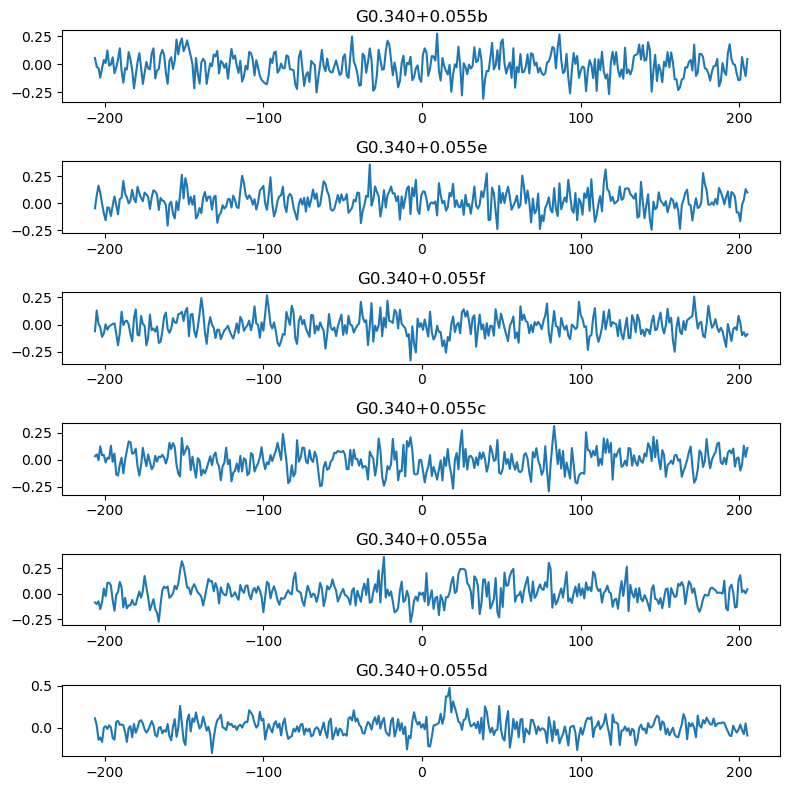

In [10]:
### now let's try plotting
fig, axes = plt.subplots(nrows=len(cube_only_leaf_ID),ncols=1,figsize=(8,8))
for i in range(len(cube_only_leaf_ID)):
    ax = axes[i]
    ax.plot(spectral_x,spectral_y_array[i,:])
    ax.set_title(cube_only_leaf_ID[i])
plt.tight_layout()
plt.show()

In [171]:
### alternative extraction using mask
## load in cube as spectral-cube object
#scube = SpectralCube.read(cube_hdu)


In [14]:
### ok now do the same as above but grab the all pixels from each leaf and apply the mask

### identify pixels for each leaf in the cloud using the mask
### then convert those pixels to cube coordinates

cleaves = np.empty(0, dtype=int)
for i, leafi in enumerate(catalog['leaf_ID']): 
    if leafi.startswith(cube_ID[0:8]): 
        print(leafi, catalog['glon'][i], catalog['glat'][i])
        cleaves = np.append(arr=cleaves, values=catalog['index'][i])
print(cleaves)

leaf_avg_spectra = np.empty((len(cleaves),cube_hdu[0].header['NAXIS3']))
for i, leaf_index in enumerate(cleaves):
    leafi_pix_mosaic = np.where(cat_mask==leaf_index)
    leafi_pix_world = cont_wcs.pixel_to_world_values(leafi_pix_mosaic[1],leafi_pix_mosaic[0])
    leafi_pix_cube = cube_wcs.world_to_pixel_values(leafi_pix_world[0],leafi_pix_world[1],0)[:-1]
    
    ### create average spectrum array (for each channel)
    avg_spectrum = np.zeros(cube_hdu[0].header['NAXIS3'])
    for j in range(cube_hdu[0].header['NAXIS3']):
        leafpix_j_x = np.array(leafi_pix_cube[0],dtype=int)
        leafpix_j_y = np.array(leafi_pix_cube[1],dtype=int)
        avg_spectrum[j] = np.average(cube_hdu[0].data[j,leafpix_j_y,leafpix_j_x])#,
                                 #weights=cont_mosaic_hdu[0].data[leafi_pix_mosaic[0],leafi_pix_mosaic[1]])
    
    leaf_avg_spectra[i,:] = avg_spectrum


G0.340+0.055b 0.3330642582708224 0.049967397562175615
G0.340+0.055e 0.34265706298157605 0.05298204101365671
G0.340+0.055f 0.34377680736986665 0.053117929174375814
G0.340+0.055c 0.3421168488828452 0.054119701971242405
G0.340+0.055a 0.34419706330829025 0.05504677800577873
G0.340+0.055d 0.34494258258346605 0.0572632387679772
[23952 24092 24098 24109 24139 24215]


In [15]:
print(leafi_pix_mosaic[0].shape, leafi_pix_cube[0].shape)

(69,) (69,)


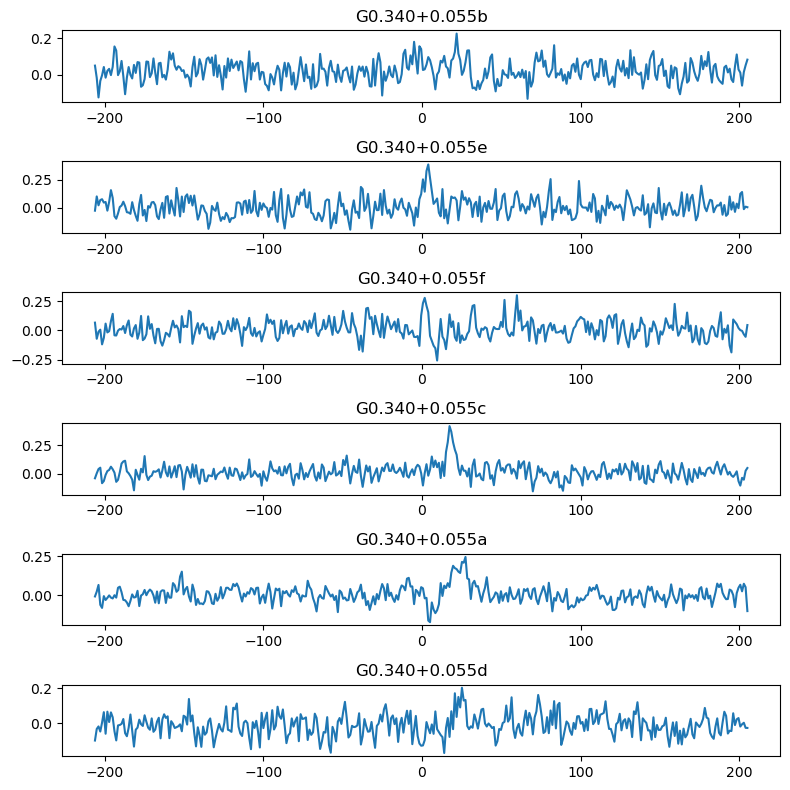

In [16]:
### now let's try plotting
spectral_x = np.linspace(cube_hdu[0].header['CRVAL3'],
                         cube_hdu[0].header['CDELT3']*(cube_hdu[0].header['NAXIS3'])/2.,
                         cube_hdu[0].header['NAXIS3'])

fig, axes = plt.subplots(nrows=len(cube_only_leaf_ID),ncols=1,figsize=(8,8))
for i in range(len(leaf_avg_spectra[:,0])):
    ax = axes[i]
    ax.plot(spectral_x,leaf_avg_spectra[i,:])
    ax.set_title(cube_only_leaf_ID[i])
plt.tight_layout()
plt.show()

(0.0, 204.0)

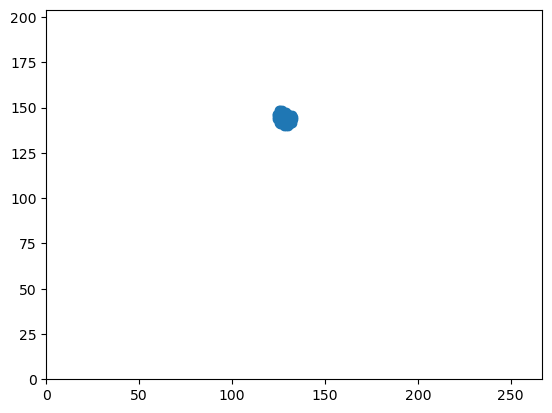

In [175]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.scatter(leafi_pix_cube[0], leafi_pix_cube[1])
ax.set_xlim(0,267)
ax.set_ylim(0,204)

In [156]:
cube_hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  267                                                  
NAXIS2  =                  204                                                  
NAXIS3  =                  370                                                  
BMAJ    = 0.001059928469325297                                                  
BMIN    = 0.000980649181980523                                                  
BPA     =    6.443205712645679                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = 'G0.106-0'                                                            
BUNIT   = 'Jy/beam '           /Brightness (pixel) unit                         
TELESCOP= 'SMA     '        

In [44]:
colList = []

#for j in range (3):
for i, leaf_ID in enumerate(cube_only_leaf_ID):
    print(i, leaf_ID)
    colList.append(fits.Column(name=leaf_ID+'_velocity_h2co_218.2GHZ', format='1E', 
                               array=spectral_x, unit='u.km/u.s'))
    colList.append(fits.Column(name=leaf_ID+'_intensity_h2co_218.2GHZ', format='1E', 
                               array=leaf_avg_spectra[i,:], unit='u.jy/u.beam'))
    

#colList.append(fits.Column(name='leaf_ID', format='20A', array=cube_only_leaf_ID))
#colList.append(fits.Column(name='spectral_intensity', format='PE()', array=spectral_y_array[:,:]))

colDefs = fits.ColDefs(colList)
out_table_hdu = fits.BinTableHDU.from_columns(colDefs)
out_table_hdu.header['BMAJ'] = cube_hdu[0].header['BMAJ']
out_table_hdu.header['BMIN'] = cube_hdu[0].header['BMIN']
#out_table_hdu.header['LEAF_IDs'] = cube_only_leaf_ID



0 G0.340+0.055b
1 G0.340+0.055e
2 G0.340+0.055f
3 G0.340+0.055c
4 G0.340+0.055a
5 G0.340+0.055d


In [45]:
out_table_hdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   48 / length of dimension 1                          
NAXIS2  =                  369 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   12 / number of table fields                         
TTYPE1  = 'G0.340+0.055b_velocity_h2co_218.2GHZ'                                
TFORM1  = '1E      '                                                            
TUNIT1  = 'u.km/u.s'                                                            
TTYPE2  = 'G0.340+0.055b_intensity_h2co_218.2GHZ'                               
TFORM2  = '1E      '        

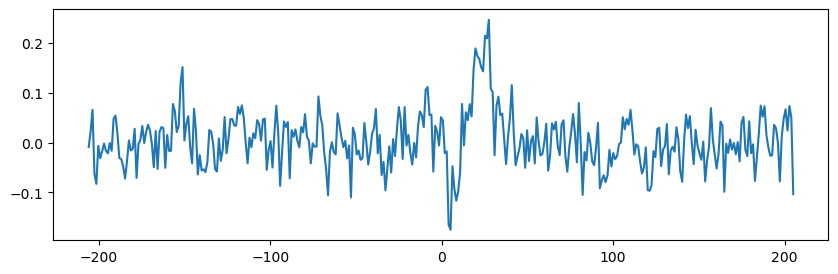

In [47]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,3))
ax.plot(out_table_hdu.data['G0.340+0.055a_velocity_h2co_218.2GHz'][:],
        out_table_hdu.data['G0.340+0.055a_intensity_h2co_218.2GHz'][:])


In [48]:
out_table_hdu.data['G0.340+0.055a_velocity_h2co_218.2GHz'].shape

(369,)

In [35]:
# tdict = {'leaf_ID': cube_only_leaf_ID}
# for i, leaf_ID in enumerate(cube_only_leaf_ID):
#     print(i, leaf_ID)
#     tdict[leaf_ID+'_velocity_h2co_218.2GHZ'] = spectral_x
#     tdict[leaf_ID+'_intensity_h2co_218.2GHZ'] = leaf_avg_spectra[i,:]
# ftable = table.Table(tdict)